# WeatherPy
----

#### Note
Visualizing the weather of 500+ cities across the world of varying distance from the equator.
#### Below are the three observable trends based on the data of scatter plots:
* Temprature of the cities is co-related with the latitude. Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, around the world, it gets warmer towards the equator and cooler towards the poles.
* Humidity and Latitude trends in both the hemispheres are same, Liner regression shows a constant Humidity across southern and northern cities i.e. approximatly 70%.
* Trends for cloudiness with latitude is same for both the hemispheres but the cloudiness Liner regression is different, with Northern Hemisphere the value is approximatly 50 and Southern hemisphere cities has approximate value 30. 

In [34]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# Save config information.
cities_info = {
    "City" : [],
    "Lat"  : [],
    "Lng"  : [],
    "Max Temp" : [],
    "Humidity" :[],
    "Cloudiness" : [],
    "Wind Speed" : [],
    "Country"    :[],
    "Date"  : []
}
index = 1
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&q="
entry_msg = '''Beginning Data Retrieval     
-----------------------------'''
print(entry_msg)
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        cities_info["City"].append(response['name'])
        cities_info["Lat"].append(response['coord']['lat'])
        cities_info["Lng"].append(response['coord']['lon'])
        cities_info["Max Temp"].append(response['main']['temp_max'])
        cities_info["Humidity"].append(response['main']['humidity'])
        cities_info["Cloudiness"].append(response['clouds']['all'])
        cities_info["Wind Speed"].append(response['wind']['speed'])
        cities_info["Country"].append(response['sys']['country'])
        cities_info["Date"].append(response['dt'])
        print(f"Processing Record {index} | {response['name']}")
        index = index + 1
    except KeyError:
        print('City not found. Skipping...')
    
end_msg= '''-----------------------------
Data Retrieval Complete      
-----------------------------''' 
print(end_msg)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | Richards Bay
Processing Record 2 | Albany
Processing Record 3 | Sesheke
Processing Record 4 | Hermanus
City not found. Skipping...
Processing Record 5 | Qaanaaq
Processing Record 6 | Assiut
Processing Record 7 | Yerbogachën
Processing Record 8 | Haines Junction
Processing Record 9 | Bredasdorp
Processing Record 10 | Chokurdakh
Processing Record 11 | Hithadhoo
Processing Record 12 | Talaya
Processing Record 13 | Bluff
Processing Record 14 | Lubango
Processing Record 15 | Podareš
Processing Record 16 | Baruun-Urt
Processing Record 17 | Sittwe
Processing Record 18 | Jamestown
Processing Record 19 | Raudeberg
Processing Record 20 | Saint Paul Harbor
Processing Record 21 | Selizharovo
City not found. Skipping...
Processing Record 22 | Formosa
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | Rikitea
Processing Record 24 | Mataura
Processing Record 25 | Kutum
Processing Record 26 | 

### Convert Raw Data to DataFrame
* Exporting the city data into a .csv.
* Displaying the DataFrame

In [37]:
cities_df = pd.DataFrame(cities_info)
cities_df.to_csv("cities.csv",index=False,header=True)
cities_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [38]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,284.20,69,0,1.54,ZA,1594954455
1,Albany,42.60,-73.97,292.59,84,100,0.45,US,1594954456
2,Sesheke,-17.48,24.30,278.15,64,0,0.50,ZM,1594954456
3,Hermanus,-34.42,19.23,279.82,89,0,1.34,ZA,1594954457
4,Qaanaaq,77.48,-69.36,279.30,74,55,1.51,GL,1594954254


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
cities_df = cities_df.loc[cities_df['Humidity'] <= 100,:]
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.892748,19.603404,293.359504,71.026596,48.859929,3.481684,1.594955e+09
std,33.166258,90.879839,7.793819,20.508050,39.377120,2.311538,1.821587e+02
min,-54.800000,-179.170000,264.150000,3.000000,0.000000,0.080000,1.594954e+09
25%,-7.402500,-57.607500,287.590000,60.000000,3.000000,1.730000,1.594955e+09
50%,22.585000,24.915000,294.150000,75.000000,43.000000,3.100000,1.594955e+09
75%,48.240000,102.272500,299.820000,87.000000,90.000000,4.600000,1.594955e+09
max,78.220000,179.320000,314.150000,100.000000,100.000000,12.900000,1.594955e+09


In [40]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,284.20,69,0,1.54,ZA,1594954455
1,Albany,42.60,-73.97,292.59,84,100,0.45,US,1594954456
2,Sesheke,-17.48,24.30,278.15,64,0,0.50,ZM,1594954456
3,Hermanus,-34.42,19.23,279.82,89,0,1.34,ZA,1594954457
4,Qaanaaq,77.48,-69.36,279.30,74,55,1.51,GL,1594954254


In [41]:
# Export the City_Data into a csv
cities_df.to_csv("Final_City_data.csv",index=False)
today= time.strftime("%m/%d/%Y", time.gmtime())


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

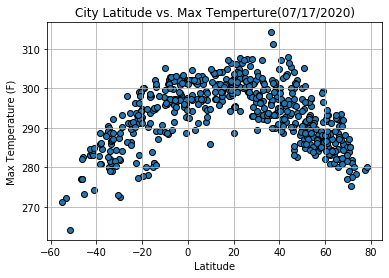

In [57]:
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
fig1, ax1 = plt.subplots()
ax1.set_title(f'City Latitude vs. Max Temperture({today})')
ax1.scatter(x_values,y_values,edgecolors="black")
ax1.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("CityLatitudeVsMaxTemp.png")

## Latitude vs. Humidity Plot

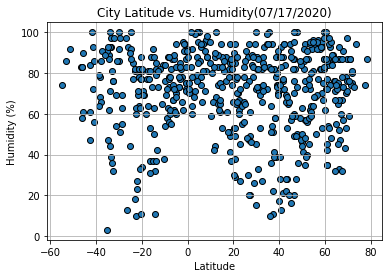

In [60]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
fig2, ax2 = plt.subplots()
ax2.set_title(f'City Latitude vs. Humidity({today})')
ax2.scatter(x_values,y_values,edgecolors="black")
ax2.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("CityLatitudeVsMaxHumid.png")

## Latitude vs. Cloudiness Plot

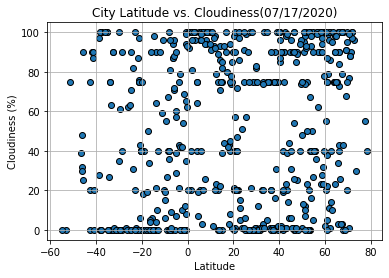

In [58]:
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
fig1, ax3 = plt.subplots()
ax3.set_title(f'City Latitude vs. Cloudiness({today})')
ax3.scatter(x_values,y_values,edgecolors="black")
ax3.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("CityLatitudeVsCloud.png")

## Latitude vs. Wind Speed Plot

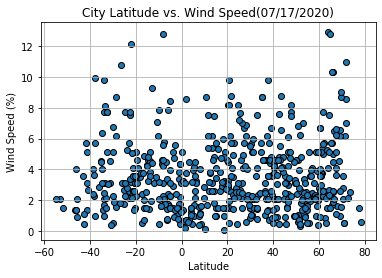

In [59]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
fig1, ax4 = plt.subplots()
ax4.set_title(f'City Latitude vs. Wind Speed({today})')
ax4.scatter(x_values,y_values,edgecolors="black")
ax4.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.savefig("CityLatitudeVsWindSp.png")

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def createLinearRegressionplots(x_value,y_value,title,x_label,y_label):
    fig1, ax5 = plt.subplots()
    ax5.set_title(f'{title}({today})')
    ax5.scatter(x_value,y_value,edgecolors="black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    style = dict(size=15, color='red')
    x = round(x_value.min(),0)
    y = round(y_value.min(),0)
    ax5.text(x, y, line_eq,**style)
    #ax5.annotate(line_eq,xy=(0, 0),fontsize=5,color="red")
    ax5.plot(x_value,regress_values,"r-")
    plt.savefig(f"{title}.png")
    

In [47]:
# Create Northern and Southern Hemisphere DataFrames
N_cities_df = cities_df.loc[cities_df['Lat'] >= 0,:]
S_cities_df = cities_df.loc[cities_df['Lat'] < 0,:]
S_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,284.20,69,0,1.54,ZA,1594954455
2,Sesheke,-17.48,24.30,278.15,64,0,0.50,ZM,1594954456
3,Hermanus,-34.42,19.23,279.82,89,0,1.34,ZA,1594954457
8,Bredasdorp,-34.53,20.04,280.15,87,0,3.10,ZA,1594954463
10,Hithadhoo,-0.60,73.08,302.16,72,94,4.32,MV,1594954464
...,...,...,...,...,...,...,...,...,...
551,Dargaville,-35.93,173.88,287.97,89,100,2.83,NZ,1594954857
552,São Miguel do Araguaia,-13.28,-50.16,295.33,42,10,1.94,BR,1594954978
555,Departamento de Maldonado,-34.67,-54.92,282.59,93,0,3.10,UY,1594954894
557,Karratha,-20.74,116.85,298.09,33,6,1.33,AU,1594954728


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4991438525383055


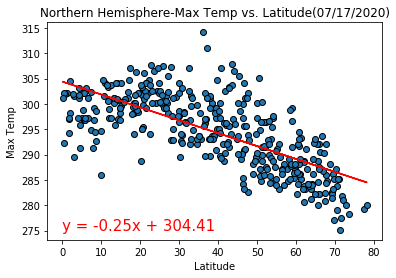

In [48]:
createLinearRegressionplots(N_cities_df['Lat'],N_cities_df['Max Temp'],'Northern Hemisphere-Max Temp vs. Latitude','Latitude','Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5777544347726903


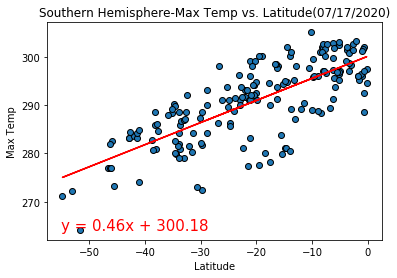

In [49]:
createLinearRegressionplots(S_cities_df['Lat'],S_cities_df['Max Temp'],'Southern Hemisphere-Max Temp vs. Latitude','Latitude','Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0023972342685660564


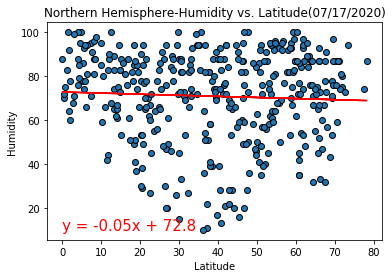

In [50]:
createLinearRegressionplots(N_cities_df['Lat'],N_cities_df['Humidity'],'Northern Hemisphere-Humidity vs. Latitude','Latitude','Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.827076565928681e-06


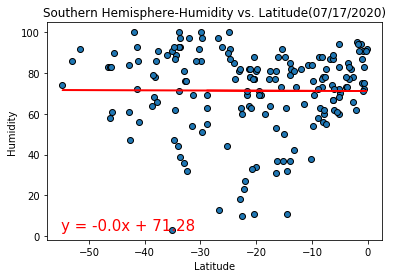

In [51]:
createLinearRegressionplots(S_cities_df['Lat'],S_cities_df['Humidity'],'Southern Hemisphere-Humidity vs. Latitude','Latitude','Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009382465471076892


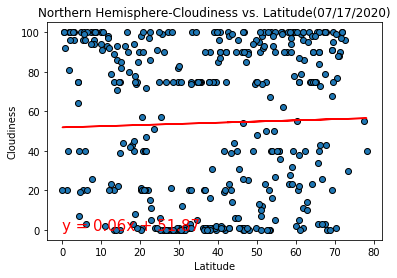

In [52]:
createLinearRegressionplots(N_cities_df['Lat'],N_cities_df['Cloudiness'],'Northern Hemisphere-Cloudiness vs. Latitude','Latitude','Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004248402058659419


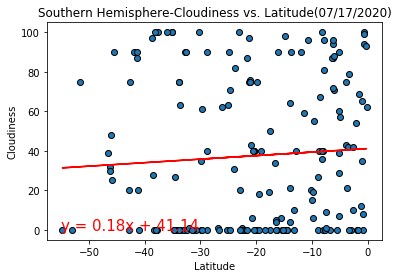

In [53]:
createLinearRegressionplots(S_cities_df['Lat'],S_cities_df['Cloudiness'],'Southern Hemisphere-Cloudiness vs. Latitude','Latitude','Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008548324789197462


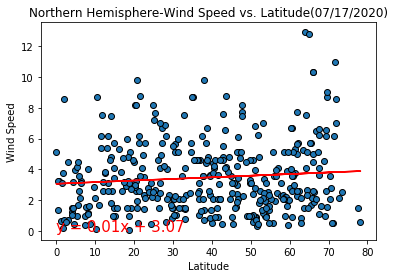

In [54]:
createLinearRegressionplots(N_cities_df['Lat'],N_cities_df['Wind Speed'],'Northern Hemisphere-Wind Speed vs. Latitude','Latitude','Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0014067282623043606


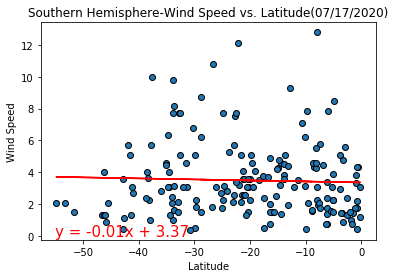

In [55]:
createLinearRegressionplots(S_cities_df['Lat'],S_cities_df['Wind Speed'],'Southern Hemisphere-Wind Speed vs. Latitude','Latitude','Wind Speed')